## Homework Assignment

Using the same data provided in the last problem:

a. Develop the cycling scheme with a warranted discharge burnup limit of 50,000 MWD/MTU.

b. Determine the End-of-Cycle (EOC) core average burnup for the cycling schemes developed for the last problem and part a. Assuming a uniform power distribution at all times.

c. Indicate how one would expect fuel cycle costs to behave as a function of the discharge burnup limit and why.


In [22]:
from IPython.display import display, Math
import math

# Defining the additional data
thermal_power = 2436  # in MWth
refueling_cycle = 24  # in months
capacity_factor = 0.9  # in percent
num_assemblies = 560  # total assemblies
assembly_loading = 190  # kg U per assembly
discharge_burnup_limit = 50000  # MWD/MTU

# Total energy production
Tot_energy = capacity_factor * thermal_power * refueling_cycle * 30
display(f"Total energy production: {Tot_energy:.0f} MWd")

'Total energy production: 1578528 MWd'

In [23]:
# Cycle burnup
core_mass = num_assemblies * assembly_loading * 1e-3
Bu_cycle = Tot_energy / core_mass
display(f"Cycle burnup: {Bu_cycle:.2f} MWd/tU")

'Cycle burnup: 14835.79 MWd/tU'

In [24]:
# Compute the number of regions which usually is also the number of cycles that a fuel assembly is used for
num_regions = discharge_burnup_limit / Bu_cycle
display(f"Number of regions: {num_regions:.2f}")

'Number of regions: 3.37'

**We have 4 regions.**  
Since it's not an integer all the assemblies will be for sure burned for **3 cycles**.  
Some of the assemblies will be burned for **4 cycles**.  
Each region will be divided into **2 batches**.

In [25]:
# Number of fuel assemblies for region
assemblies_for_region = num_assemblies / num_regions
print(f"Assemblies for region: {assemblies_for_region:.2f}")
# Round it up to be conservative on the Bu limit
round_up_assemblies_for_region = math.ceil(assemblies_for_region)
print(f"Rounded up to: {round_up_assemblies_for_region:.0f}")

Assemblies for region: 166.16
Rounded up to: 167


In [26]:
# Number of full regions: 2.7 --> 2 full regions
num_regions_int = int(num_regions)
print(f"Number of full regions: {num_regions_int}")

Number of full regions: 3


Which means that we will have **3** regions with **167 assemblies** and the last region will host the remaining assemblies

In [27]:
region_1 = round_up_assemblies_for_region
region_2 = round_up_assemblies_for_region
region_3 = round_up_assemblies_for_region # NEW FULL REGION
region_4 = num_assemblies - 3 * round_up_assemblies_for_region # 2 --> 3
print(f"Region 1: {region_1:.0f}")
print(f"Region 2: {region_2:.0f}")
print(f"Region 3: {region_3:.0f}")
print(f"Region 4: {region_4:.0f}")

Region 1: 167
Region 2: 167
Region 3: 167
Region 4: 59


The smaller region is a single batch that gets burned 3 times.  
The other regions are divided into 2 batches to be burned 2 and 3 times  
The number of assemblies burned 3 times is the number of elements in the third batch  
Which means that the number of assemblies burned 2 times is the larger region - smaller region

In [28]:
Region_1_Batch_1 = region_1 - region_4
Region_1_Batch_2 = region_4
Region_2_Batch_1 = region_2 - region_4
Region_2_Batch_2 = region_4
Region_3_Batch_1 = region_3 - region_4
Region_3_Batch_2 = region_4
Region_4_Batch_1 = region_4

print(f"Region 1 Batch 1 (3 cycles): {Region_1_Batch_1:.0f}")
print(f"Region 1 Batch 2 (4 cycles): {Region_1_Batch_2:.0f}")
print(f"Region 2 Batch 1 (3 cycles): {Region_2_Batch_1:.0f}")
print(f"Region 2 Batch 2 (4 cycles): {Region_2_Batch_2:.0f}")
print(f"Region 3 Batch 1 (3 cycles): {Region_3_Batch_1:.0f}")
print(f"Region 3 Batch 2 (4 cycles): {Region_3_Batch_2:.0f}")
print(f"Region 4 Batch 1 (4 cycles): {Region_4_Batch_1:.0f}")

Region 1 Batch 1 (3 cycles): 108
Region 1 Batch 2 (4 cycles): 59
Region 2 Batch 1 (3 cycles): 108
Region 2 Batch 2 (4 cycles): 59
Region 3 Batch 1 (3 cycles): 108
Region 3 Batch 2 (4 cycles): 59
Region 4 Batch 1 (4 cycles): 59


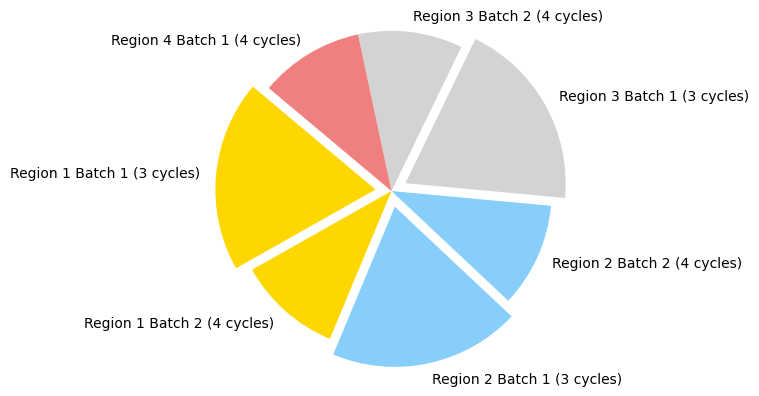

In [31]:
# Pie graph for the distribution of the fuel assemblies
import matplotlib.pyplot as plt

labels = ['Region 1 Batch 1 (3 cycles)', 'Region 1 Batch 2 (4 cycles)', 
          'Region 2 Batch 1 (3 cycles)', 'Region 2 Batch 2 (4 cycles)', 
          'Region 3 Batch 1 (3 cycles)', 'Region 3 Batch 2 (4 cycles)', 
          'Region 4 Batch 1 (4 cycles)']
sizes = [Region_1_Batch_1, Region_1_Batch_2, 
         Region_2_Batch_1, Region_2_Batch_2, 
         Region_3_Batch_1, Region_3_Batch_2,
         Region_4_Batch_1]
colors = ['gold', 'gold', 'lightskyblue', 'lightskyblue', 'lightgrey', 'lightgrey', 'lightcoral']
explode = (0.1, 0, 0.1, 0, 0.1, 0 , 0)  # explode 2 cycles batches

plt.pie(sizes, explode=explode, labels=labels, colors=colors, startangle=140)
plt.axis('equal')
plt.show()


For a quarter core symmetry we have to check:
-  region size $n_r$ should be MULTIPLE OF 4
-  Batch size MULTIPLE of 4

In [32]:
# Check if batch sizes are multiple of 4
if Region_1_Batch_1 % 4 == 0:
    print("Region 1 Batch 1 is multiple of 4")
else:
    print("Region 1 Batch 1 is not multiple of 4")

if Region_1_Batch_2 % 4 == 0:
    print("Region 1 Batch 2 is multiple of 4")
else:
    print("Region 1 Batch 2 is not multiple of 4")

if Region_2_Batch_1 % 4 == 0:
    print("Region 2 Batch 1 is multiple of 4")
else:
    print("Region 2 Batch 1 is not multiple of 4")

if Region_2_Batch_2 % 4 == 0:
    print("Region 2 Batch 2 is multiple of 4")
else:
    print("Region 2 Batch 2 is not multiple of 4")

if Region_3_Batch_2 % 4 == 0:
    print("Region 3 Batch 2 is multiple of 4")
else:
    print("Region 3 Batch 2 is not multiple of 4")

# Check if the total number of assemblies is multiple of 4
if num_assemblies % 4 == 0:
    print("Total number of assemblies is multiple of 4")
else:
    print("Total number of assemblies is not multiple of 4")

Region 1 Batch 1 is multiple of 4
Region 1 Batch 2 is not multiple of 4
Region 2 Batch 1 is multiple of 4
Region 2 Batch 2 is not multiple of 4
Region 3 Batch 2 is not multiple of 4
Total number of assemblies is multiple of 4


## Since it's not multiple of 4 we have to manually "fix" the numbers" 167 --> 168

In [33]:
region_1 = 168
region_2 = region_1
region_3 = region_1 # NEW FULL REGION
region_4 = num_assemblies - 3 * region_1 # 2 --> 3
print(f"Region 1: {region_1:.0f}")
print(f"Region 2: {region_2:.0f}")
print(f"Region 3: {region_3:.0f}")
print(f"Region 4: {region_4:.0f}")

Region 1: 168
Region 2: 168
Region 3: 168
Region 4: 56


In [34]:
Region_1_Batch_1 = region_1 - region_4
Region_1_Batch_2 = region_4
Region_2_Batch_1 = region_2 - region_4
Region_2_Batch_2 = region_4
Region_3_Batch_1 = region_3 - region_4
Region_3_Batch_2 = region_4
Region_4_Batch_1 = region_4

print(f"Region 1 Batch 1 (3 cycles): {Region_1_Batch_1:.0f}")
print(f"Region 1 Batch 2 (4 cycles): {Region_1_Batch_2:.0f}")
print(f"Region 2 Batch 1 (3 cycles): {Region_2_Batch_1:.0f}")
print(f"Region 2 Batch 2 (4 cycles): {Region_2_Batch_2:.0f}")
print(f"Region 3 Batch 1 (3 cycles): {Region_3_Batch_1:.0f}")
print(f"Region 3 Batch 2 (4 cycles): {Region_3_Batch_2:.0f}")
print(f"Region 4 Batch 1 (4 cycles): {Region_4_Batch_1:.0f}")

Region 1 Batch 1 (3 cycles): 112
Region 1 Batch 2 (4 cycles): 56
Region 2 Batch 1 (3 cycles): 112
Region 2 Batch 2 (4 cycles): 56
Region 3 Batch 1 (3 cycles): 112
Region 3 Batch 2 (4 cycles): 56
Region 4 Batch 1 (4 cycles): 56


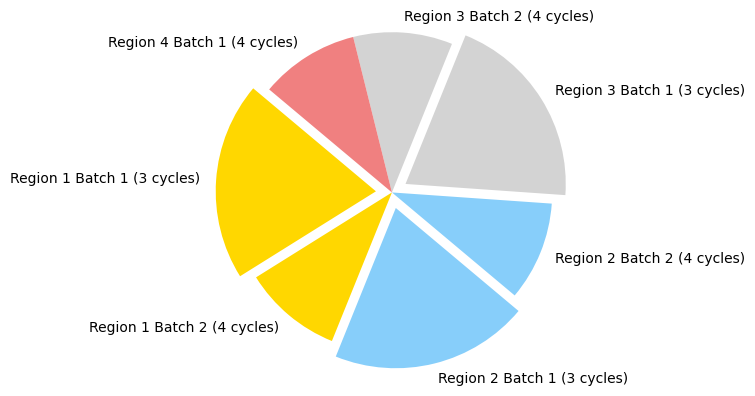

In [35]:
# Pie graph for the distribution of the fuel assemblies
import matplotlib.pyplot as plt

labels = ['Region 1 Batch 1 (3 cycles)', 'Region 1 Batch 2 (4 cycles)', 
          'Region 2 Batch 1 (3 cycles)', 'Region 2 Batch 2 (4 cycles)', 
          'Region 3 Batch 1 (3 cycles)', 'Region 3 Batch 2 (4 cycles)', 
          'Region 4 Batch 1 (4 cycles)']
sizes = [Region_1_Batch_1, Region_1_Batch_2, 
         Region_2_Batch_1, Region_2_Batch_2, 
         Region_3_Batch_1, Region_3_Batch_2,
         Region_4_Batch_1]
colors = ['gold', 'gold', 'lightskyblue', 'lightskyblue', 'lightgrey', 'lightgrey', 'lightcoral']
explode = (0.1, 0, 0.1, 0, 0.1, 0 , 0)  # explode 2 cycles batches

plt.pie(sizes, explode=explode, labels=labels, colors=colors, startangle=140)
plt.axis('equal')
plt.show()


Now all the values are multiples of 4 --> Quarter symmetry is ok.  
The cycle table is created similarly.

## b) Compute avg discharge Bu
$ Bu_{core, discharge} = \frac{N + 1}{2N} Bu_{fuel, discharge} $  
$N$ is the cycles in a fuel cycle, which is (for our case) always equale to the number of regions $N_r$.  
This has to be computed for this case and for the previous case (Homework 8)

In [38]:
Regions_40GWd = 3
Regions_50GWd = 4

Bu_core_40GWd = 40000 * (Regions_40GWd + 1) / (2 * Regions_40GWd)
Bu_core_50GWd = 50000 * (Regions_50GWd + 1) / (2 * Regions_50GWd)

print(f"Discharge Burnup of the core: {Bu_core_40GWd/1000:.2f} GWd/tU with 40GWd/tU fuel Bu limit")
print(f"Discharge Burnup of the core: {Bu_core_50GWd/1000:.2f} GWd/tU with 50GWd/tU fuel Bu limit")

Discharge Burnup of the core: 26.67 GWd/tU with 40GWd/tU fuel Bu limit
Discharge Burnup of the core: 31.25 GWd/tU with 50GWd/tU fuel Bu limit


## c) Fuel cycle cost expectation
As we increase the admissible fuel burnup, we can run the reactor at the rated power for a longer time or produce more power.  
Which is advantagious from an economics point of view.  
BUT  
To do so we, most likely, have to increase the enrichment, which increases the cost of fuel.  
So there will an optimum point between longer cycle time and higher enrichment. 

## NOTE
In practice we want to use the maximum number of regions possible since it will decrease the discharge Bu of the core.  
At the limit of $N_r \rightarrow \infty$  we get $Bu_{core, discharge} = \frac{1}{2}$  
This means that we can run the reactor for longer or at higher nominal power (less likely) to reach the maximum fuel Burnup (fixed due to reactivity)
  

When we increase the allowable fuel discharge burnup we can have a grater number of regions. To take advantage of this we have to either:
- Increase $T_{cycle}$ limited by seasonal grid demands
- Increase $P_{output}$ limited by safety, regulations and other design limits.